In [438]:
import os
from os import listdir
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.optimizers import Adam, RMSprop, SGD
#warnings.filterwarnings('ignore')                  # Turn the warnings off.
%matplotlib inline

In [439]:
path_init = '/Users/marcooliveira/Desktop/recaptcha'
os.chdir(path_init)

dir_true = path_init + '/filtered palm trees'
dir_false = path_init + '/filtered non palm trees' #escadinhas

In [440]:
print(os.getcwd())

/Users/marcooliveira/Desktop/recaptcha


In [441]:
def load_images(path):
    # return array of images

    images_list = listdir(path)
    print (listdir(path)[0])
    list_images = []
    first = True
    
    for image in images_list:
        img = Image.open(path + image)
        npframe = np.array(img.getdata())
        list_images.append (npframe.flatten())
        if first:
            first = False
            print (npframe.shape)
            print (npframe.flatten().shape)
            
    
    return pd.DataFrame(list_images)

In [442]:
imgs_true = load_images(dir_true + '/')
imgs_false = load_images(dir_false + '/')

filtered palm trees2021-09-22 02-25-40.431966.png
(9801, 3)
(29403,)
filtered a fire hydrant2021-09-24 22-01-26.357290.png
(9801, 3)
(29403,)


In [443]:
print(imgs_true.shape)
print(imgs_false.shape)
df = imgs_false
print (f'len = {imgs_false.shape[1]}')
if imgs_false.shape[1] == 4*99*99:
    df.drop(df.iloc[:, 3*99*99:], inplace = True, axis = 1)
    print (imgs_false)
if imgs_true.shape[1] == 4*99*99:
    imgs_true.drop(imgs_true.iloc[:, 3*99*99], inplace = True, axis = 1)
print (imgs_true.shape)
print (imgs_false.shape)

(620, 29403)
(208, 39204)
len = 39204
     0      1      2      3      4      5      6      7      8      9      \
0       48     56     45     58     65     47     67     72     49     71   
1      111    117    103    104    110     96     97    101     87    108   
2      175    180    176    176    181    177    169    173    172    184   
3       90     68     55     89     65     53     90     63     52     91   
4      109    129    153    109    130    151    109    130    151    109   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
203     99     93     59    103     97     63    115    106     73    113   
204    210    213    194    218    220    209    216    217    212    215   
205    196    183    175    255    200    183    176    255    204    186   
206    235    233    236    233    231    234    231    229    232    233   
207     70     44     31     80     42     21     79     44     24     72   

     ...  29393  29394  29395  29396 

In [444]:
img_true_scaled = imgs_true/255
imgs_false_scaled = imgs_false /255

In [445]:
img_true_scaled

,0,1,2,3,4,5,6,7,8,9,...,29393,29394,29395,29396,29397,29398,29399,29400,29401,29402
0,0.482353,0.552941,0.607843,0.486275,0.556863,0.603922,0.486275,0.556863,0.603922,0.486275,...,0.623529,0.533333,0.537255,0.556863,0.525490,0.537255,0.556863,0.447059,0.458824,0.478431
1,0.776471,0.749020,0.725490,0.764706,0.729412,0.709804,0.752941,0.717647,0.698039,0.756863,...,0.141176,0.117647,0.121569,0.101961,0.094118,0.117647,0.109804,0.098039,0.133333,0.121569
2,0.258824,0.258824,0.149020,0.231373,0.250980,0.094118,0.207843,0.235294,0.070588,0.243137,...,0.325490,0.337255,0.298039,0.250980,0.321569,0.282353,0.235294,0.372549,0.333333,0.286275
3,0.733333,0.717647,0.674510,0.749020,0.760784,0.796078,0.749020,0.749020,0.796078,0.776471,...,0.384314,0.556863,0.454902,0.396078,0.576471,0.474510,0.423529,0.505882,0.403922,0.352941
4,0.407843,0.345098,0.282353,0.541176,0.478431,0.415686,0.631373,0.568627,0.505882,0.549020,...,0.317647,0.278431,0.301961,0.301961,0.258824,0.282353,0.282353,0.305882,0.313725,0.301961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,0.850980,0.850980,0.843137,0.878431,0.874510,0.866667,0.870588,0.866667,0.858824,0.862745,...,0.498039,0.458824,0.478431,0.490196,0.466667,0.486275,0.498039,0.439216,0.458824,0.470588
616,0.000000,0.035294,0.133333,0.000000,0.027451,0.172549,0.039216,0.109804,0.258824,0.223529,...,0.556863,0.580392,0.568627,0.541176,0.580392,0.568627,0.541176,0.568627,0.556863,0.529412
617,0.733333,0.768627,0.796078,0.749020,0.764706,0.776471,0.764706,0.756863,0.760784,0.772549,...,0.090196,0.149020,0.094118,0.082353,0.160784,0.105882,0.094118,0.160784,0.105882,0.094118
618,0.698039,0.705882,0.764706,0.698039,0.709804,0.776471,0.694118,0.717647,0.780392,0.690196,...,0.313725,0.466667,0.474510,0.317647,0.474510,0.494118,0.274510,0.443137,0.486275,0.227451


In [446]:
imgs_false_scaled

,0,1,2,3,4,5,6,7,8,9,...,29393,29394,29395,29396,29397,29398,29399,29400,29401,29402
0,0.188235,0.219608,0.176471,0.227451,0.254902,0.184314,0.262745,0.282353,0.192157,0.278431,...,0.168627,0.360784,0.333333,0.219608,0.443137,0.341176,0.243137,0.517647,0.368627,0.294118
1,0.435294,0.458824,0.403922,0.407843,0.431373,0.376471,0.380392,0.396078,0.341176,0.423529,...,0.094118,0.419608,0.458824,0.188235,0.411765,0.450980,0.203922,0.388235,0.431373,0.211765
2,0.686275,0.705882,0.690196,0.690196,0.709804,0.694118,0.662745,0.678431,0.674510,0.721569,...,0.235294,0.407843,0.549020,0.203922,0.470588,0.596078,0.270588,0.529412,0.611765,0.341176
3,0.352941,0.266667,0.215686,0.349020,0.254902,0.207843,0.352941,0.247059,0.203922,0.356863,...,0.521569,0.666667,0.549020,0.556863,0.545098,0.435294,0.431373,0.525490,0.415686,0.411765
4,0.427451,0.505882,0.600000,0.427451,0.509804,0.592157,0.427451,0.509804,0.592157,0.427451,...,0.674510,0.670588,0.709804,0.705882,0.682353,0.701961,0.686275,0.737255,0.709804,0.670588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.388235,0.364706,0.231373,0.403922,0.380392,0.247059,0.450980,0.415686,0.286275,0.443137,...,0.223529,0.521569,0.490196,0.298039,0.513725,0.466667,0.301961,0.458824,0.384314,0.254902
204,0.823529,0.835294,0.760784,0.854902,0.862745,0.819608,0.847059,0.850980,0.831373,0.843137,...,0.458824,0.478431,0.474510,0.466667,0.337255,0.333333,0.325490,0.435294,0.419608,0.407843
205,0.768627,0.717647,0.686275,1.000000,0.784314,0.717647,0.690196,1.000000,0.800000,0.729412,...,0.176471,0.207843,1.000000,0.400000,0.270588,0.298039,1.000000,0.607843,0.545098,0.556863
206,0.921569,0.913725,0.925490,0.913725,0.905882,0.917647,0.905882,0.898039,0.909804,0.913725,...,0.419608,0.462745,0.415686,0.431373,0.458824,0.411765,0.419608,0.458824,0.415686,0.400000


In [447]:
img_true_scaled['label'] = 1
imgs_false_scaled['label'] = 0

In [448]:
frames = [img_true_scaled, imgs_false_scaled]
df_final = pd.concat (frames)
df_final

,0,1,2,3,4,5,6,7,8,9,...,29394,29395,29396,29397,29398,29399,29400,29401,29402,label
0,0.482353,0.552941,0.607843,0.486275,0.556863,0.603922,0.486275,0.556863,0.603922,0.486275,...,0.533333,0.537255,0.556863,0.525490,0.537255,0.556863,0.447059,0.458824,0.478431,1
1,0.776471,0.749020,0.725490,0.764706,0.729412,0.709804,0.752941,0.717647,0.698039,0.756863,...,0.117647,0.121569,0.101961,0.094118,0.117647,0.109804,0.098039,0.133333,0.121569,1
2,0.258824,0.258824,0.149020,0.231373,0.250980,0.094118,0.207843,0.235294,0.070588,0.243137,...,0.337255,0.298039,0.250980,0.321569,0.282353,0.235294,0.372549,0.333333,0.286275,1
3,0.733333,0.717647,0.674510,0.749020,0.760784,0.796078,0.749020,0.749020,0.796078,0.776471,...,0.556863,0.454902,0.396078,0.576471,0.474510,0.423529,0.505882,0.403922,0.352941,1
4,0.407843,0.345098,0.282353,0.541176,0.478431,0.415686,0.631373,0.568627,0.505882,0.549020,...,0.278431,0.301961,0.301961,0.258824,0.282353,0.282353,0.305882,0.313725,0.301961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.388235,0.364706,0.231373,0.403922,0.380392,0.247059,0.450980,0.415686,0.286275,0.443137,...,0.521569,0.490196,0.298039,0.513725,0.466667,0.301961,0.458824,0.384314,0.254902,0
204,0.823529,0.835294,0.760784,0.854902,0.862745,0.819608,0.847059,0.850980,0.831373,0.843137,...,0.478431,0.474510,0.466667,0.337255,0.333333,0.325490,0.435294,0.419608,0.407843,0
205,0.768627,0.717647,0.686275,1.000000,0.784314,0.717647,0.690196,1.000000,0.800000,0.729412,...,0.207843,1.000000,0.400000,0.270588,0.298039,1.000000,0.607843,0.545098,0.556863,0
206,0.921569,0.913725,0.925490,0.913725,0.905882,0.917647,0.905882,0.898039,0.909804,0.913725,...,0.462745,0.415686,0.431373,0.458824,0.411765,0.419608,0.458824,0.415686,0.400000,0


In [449]:
#df_final = shuffle(df_final)
#df_final
shuffled = df_final
shuffled = shuffled.sample (frac = 1)

In [450]:
labels = shuffled['label']
df_shuffled = shuffled.drop(columns = 'label')

In [451]:
X_train, X_test, y_train, y_test = train_test_split(df_shuffled, labels, test_size = 0.3, random_state = 123)

In [452]:
X_test.shape

(249, 29403)

In [453]:
X_train = X_train.to_numpy().reshape(-1, 99, 99, 3)
X_test = X_test.to_numpy().reshape(-1, 99, 99, 3)

In [454]:
drop_prob = 0.5

my_model = Sequential()
# 1st convolution + pooling.
my_model.add(Conv2D(input_shape=(99,99,3),filters=16,kernel_size=(5,5),padding='same',activation="relu"))        # 1 channel of grayscale.
my_model.add(MaxPooling2D(pool_size=2))
# 2nd convolution + pooling.
my_model.add(Conv2D(filters=32,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
#3rd
my_model.add(Conv2D(filters=32,kernel_size=(5,5), padding='same',activation="relu"))
my_model.add(MaxPooling2D(pool_size=2))
# Flattened fully connected layer.
my_model.add(Flatten())
my_model.add(Dense(units = 1024, activation="relu"))
# Apply dropout.
my_model.add(Dropout(rate=drop_prob))
# Output layer.
my_model.add(Dense(units = 1, activation="sigmoid"))

In [455]:
my_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 99, 99, 16)        1216      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 49, 49, 32)        12832     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 4608)            

In [456]:
# Hyperparameters.
n_epochs = 25
batch_size = 200
learn_rate = 0.0005

In [457]:
my_optimizer=Adam(learning_rate=learn_rate)
my_model.compile(loss = "binary_crossentropy", optimizer = my_optimizer, metrics=["accuracy"])

In [458]:
my_summary = my_model.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 1)

Epoch 1/25
3/3 [==============================] - 3s 829ms/step - loss: 0.7259 - accuracy: 0.5964 - val_loss: 0.5515 - val_accuracy: 0.7759
Epoch 2/25
3/3 [==============================] - 2s 672ms/step - loss: 0.5848 - accuracy: 0.7396 - val_loss: 0.5756 - val_accuracy: 0.7759
Epoch 3/25
3/3 [==============================] - 2s 743ms/step - loss: 0.5896 - accuracy: 0.7327 - val_loss: 0.5141 - val_accuracy: 0.7759
Epoch 4/25
3/3 [==============================] - 3s 771ms/step - loss: 0.5596 - accuracy: 0.7409 - val_loss: 0.4913 - val_accuracy: 0.7759
Epoch 5/25
3/3 [==============================] - 3s 786ms/step - loss: 0.5482 - accuracy: 0.7402 - val_loss: 0.4859 - val_accuracy: 0.8017
Epoch 6/25
3/3 [==============================] - 3s 779ms/step - loss: 0.5311 - accuracy: 0.7623 - val_loss: 0.4487 - val_accuracy: 0.8362
Epoch 7/25
3/3 [==============================] - 3s 958ms/step - loss: 0.5158 - accuracy: 0.7596 - val_loss: 0.3903 - val_accuracy: 0.8362
Epoch 8/25
3/3 [====

In [459]:
ACC = my_model.evaluate(X_test, y_test, verbose=0)[1]    
print("Test Accuracy : {}".format(np.round(ACC,3)))

Test Accuracy : 0.791


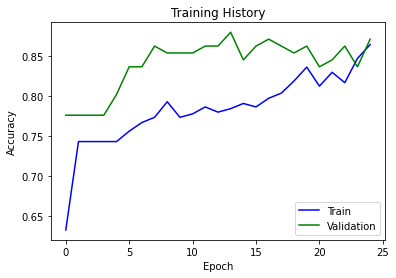

In [460]:
n_skip = 0                 # Skip the first few steps.
plt.plot(my_summary.history['accuracy'][n_skip:], c="b")
plt.plot(my_summary.history['val_accuracy'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()